In [1]:
import sys
sys.path.append('../../libs/')
import SIRmodels as mdl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# For latex use
from matplotlib import rc
rc('font',**{'family':'serif'})
rc('text', usetex=True)

In [2]:
# Originals values
N = 100000
SIIR0 = np.zeros(9)
SIIR0[1] = 10
SIIR0[2] = 10
SIIR0[0] = N - np.sum(SIIR0[1:8])

t_start = 0
t_end = 25
n_int = 10000

t_sim = np.linspace(t_start, t_end, n_int)

In [3]:
# Params
delta2PrimeParams = [5.5,0.3, 19.5] # [synch,asynch,ind]
params = [0, 6.15, 0, 5.5, 0, 6.15, 0, 0]  # Independent case
beta1_prime_arr = np.array([2,  6.15, 12,20])
#delta1_prime_arr = beta1_prime_arr/1.12
delta1_prime_arr = beta1_prime_arr/1.35


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


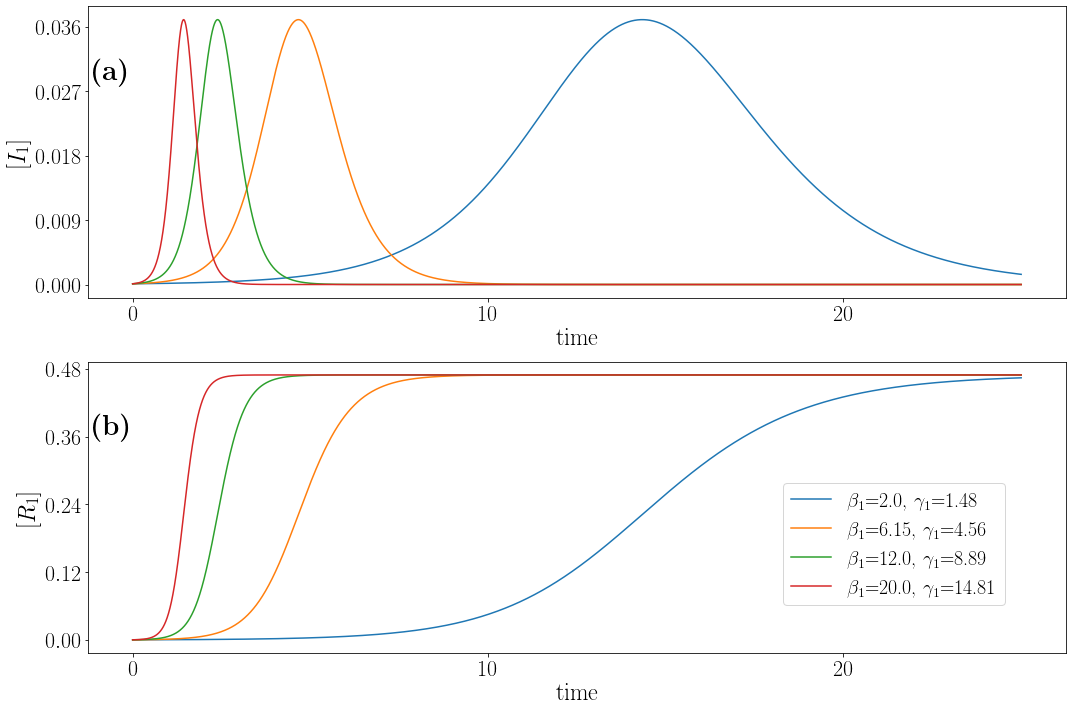

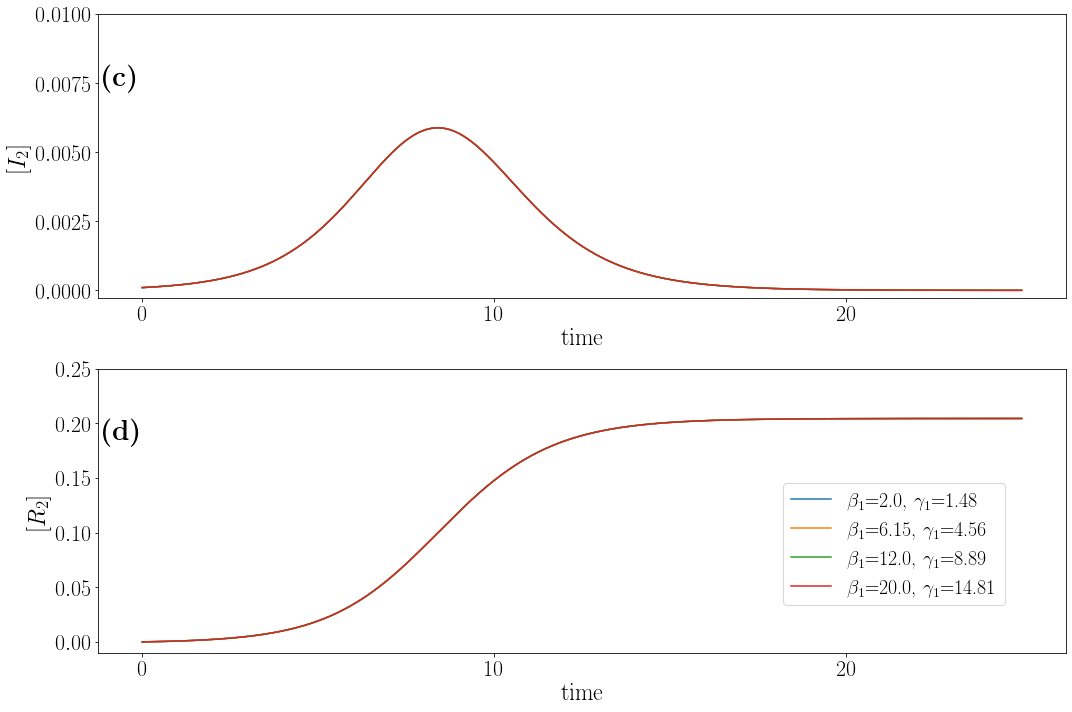

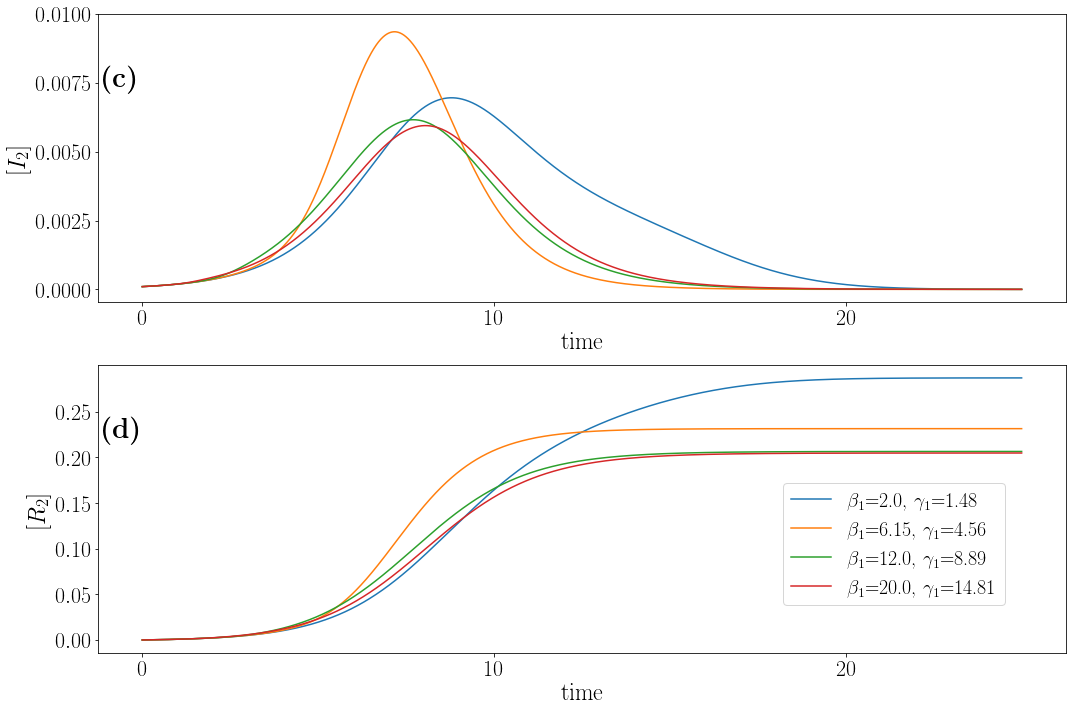

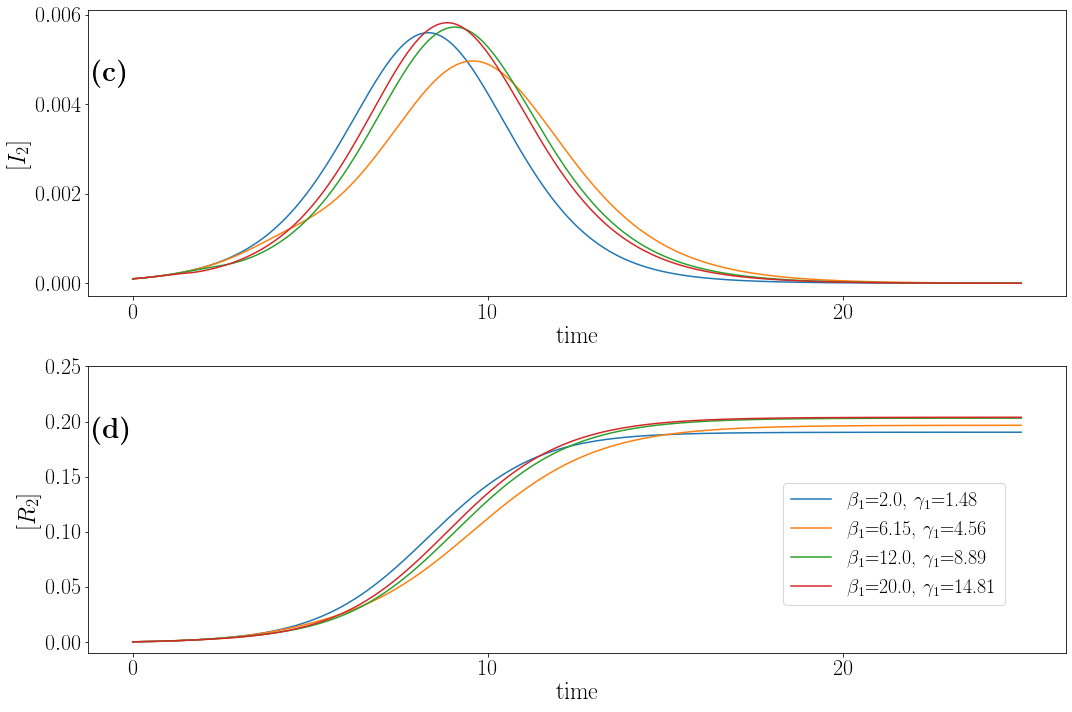

In [20]:
# Making figs
fig1, ax1 = plt.subplots(2, 1)
fig2, ax2 = plt.subplots(2, 1)
fig3, ax3 = plt.subplots(2, 1)
fig4, ax4 = plt.subplots(2, 1)

i=1 # Plot counter
for delta2prime in delta2PrimeParams:
    params_copy = params.copy()
    params_copy[7] = delta2prime
    
    #axins.append(zoomed_inset_axes(ax[i,0], 2.5, loc=1)) # zoom-factor: 2.5, location: upper-right
    for j in range(len(beta1_prime_arr)):
        params_copy[0] = beta1_prime_arr[j]
        params_copy[4] = beta1_prime_arr[j]
        params_copy[2] = delta1_prime_arr[j]
        params_copy[6] = delta1_prime_arr[j]
        
        siirSim = mdl.SIIR(SIIR0, params_copy, t_sim)
        siirSim.runEvaluation(norm=True)
        res = siirSim.getResult()
        
        inf1 = res[:, 1] + res[:, 3] + res[:, 7]
        rec1 = res[:, 4] + res[:, 6] + res[:, 8]
        inf2 = res[:, 2] + res[:, 3] + res[:, 6]
        rec2 = res[:, 5] + res[:, 7] + res[:, 8]
        
        
        if i == 1:
            ax1[0].plot(t_sim, inf1, label=r'$\beta_1$=' + str(round(beta1_prime_arr[j],2)) 
                                     + r', $\gamma_1$=' + str(round(delta1_prime_arr[j],2)))
            ax1[1].plot(t_sim, rec1)
   
            ax2[0].plot(t_sim, inf2, label=r'$\beta_1$=' + str(round(beta1_prime_arr[j],2)) 
                                     + r', $\gamma_1$=' + str(round(delta1_prime_arr[j],2)))
            ax2[1].plot(t_sim, rec2)

        if i == 2:
            ax3[0].plot(t_sim, inf2, label=r'$\beta_1$=' + str(round(beta1_prime_arr[j],2)) 
                                     + r', $\gamma_1$=' + str(round(delta1_prime_arr[j],2)))
            ax3[1].plot(t_sim, rec2)

        if i == 3:
            ax4[0].plot(t_sim, inf2, label=r'$\beta_1$=' + str(round(beta1_prime_arr[j],2)) 
                                     + r', $\gamma_1$=' + str(round(delta1_prime_arr[j],2)))
            ax4[1].plot(t_sim, rec2)
    
    i +=1

# Disease 1: Infected
ax1[0].tick_params(labelsize=22)
ax1[0].set_xlabel(r"time",fontsize=24)
ax1[0].set_ylabel(r"$[I_1]$",fontsize=24)
ax1[0].annotate(r'\textbf{(a)}', xy=(0.005,0.75), xycoords="axes fraction",fontsize=28)
ax1[0].set_xticks(np.arange(0,26,10))
ax1[0].set_yticks(np.arange(0,0.037,0.009))

# Disease 1: Recovered
ax1[1].tick_params(labelsize=22)
ax1[1].set_xlabel(r"time",fontsize=24)
ax1[1].set_ylabel(r"$[R_1]$",fontsize=24)
ax1[1].annotate(r'\textbf{(b)}', xy=(0.005,0.75), xycoords="axes fraction",fontsize=28)
ax1[1].set_xticks(np.arange(0,26,10))
ax1[1].set_yticks(np.arange(0,0.49,0.12))


ax2[0].tick_params(labelsize=22)
ax2[0].set_xlabel(r"time",fontsize=24)
ax2[0].set_ylabel(r"$[I_2]$",fontsize=24)
ax2[0].annotate(r'\textbf{(c)}', xy=(0.005,0.75), xycoords="axes fraction",fontsize=28)
ax2[0].set_xticks(np.arange(0,26,10))
ax2[0].set_yticks(np.arange(0,0.011,0.0025))

ax2[1].tick_params(labelsize=22)
ax2[1].set_xlabel(r"time",fontsize=24)
ax2[1].set_ylabel(r"$[R_{2}]$",fontsize=24)
ax2[1].annotate(r'\textbf{(d)}', xy=(0.005,0.75), xycoords="axes fraction",fontsize=28)
ax2[1].set_xticks(np.arange(0,26,10))
ax2[1].set_yticks(np.arange(0,0.26,0.05))


ax3[0].tick_params(labelsize=22)
ax3[0].set_xlabel(r"time",fontsize=24)
ax3[0].set_ylabel(r"$[I_2]$",fontsize=24)
ax3[0].annotate(r'\textbf{(c)}', xy=(0.005,0.75), xycoords="axes fraction",fontsize=28)
ax3[0].set_xticks(np.arange(0,26,10))
ax3[0].set_yticks(np.arange(0,0.011,0.0025))

ax3[1].tick_params(labelsize=22)
ax3[1].set_xlabel(r"time",fontsize=24)
ax3[1].set_ylabel(r"$[R_{2}]$",fontsize=24)
ax3[1].annotate(r'\textbf{(d)}', xy=(0.005,0.75), xycoords="axes fraction",fontsize=28)
ax3[1].set_xticks(np.arange(0,26,10))
ax3[1].set_yticks(np.arange(0,0.26,0.05))


ax4[0].tick_params(labelsize=22)
ax4[0].set_xlabel(r"time",fontsize=24)
ax4[0].set_ylabel(r"$[I_2]$",fontsize=24)
ax4[0].annotate(r'\textbf{(c)}', xy=(0.005,0.75), xycoords="axes fraction",fontsize=28)
ax4[0].set_xticks(np.arange(0,26,10))
ax3[0].set_yticks(np.arange(0,0.011,0.0025))

ax4[1].tick_params(labelsize=22)
ax4[1].set_xlabel(r"time",fontsize=24)
ax4[1].set_ylabel(r"$[R_{2}]$",fontsize=24)
ax4[1].annotate(r'\textbf{(d)}', xy=(0.005,0.75), xycoords="axes fraction",fontsize=28)
ax4[1].set_xticks(np.arange(0,26,10))
ax4[1].set_yticks(np.arange(0,0.26,0.05))


fig1.legend(loc=(0.73,0.15),fontsize=20)
fig1.set_size_inches(15,10)
fig1.tight_layout(w_pad=2.5)
fig1.savefig('images/4-1_I1.eps')

fig2.legend(loc=(0.73,0.15),fontsize=20)
fig2.set_size_inches(15,10)
fig2.tight_layout(w_pad=2.5)
fig2.savefig('images/4-1_I2_ind.eps')

fig3.legend(loc=(0.73,0.15),fontsize=20)
fig3.set_size_inches(15,10)
fig3.tight_layout(w_pad=2.5)
fig3.savefig('images/4-1_I2_coop.eps')

fig4.legend(loc=(0.73,0.15),fontsize=20)
fig4.set_size_inches(15,10)
fig4.tight_layout(w_pad=2.5)
fig4.savefig('images/4-1_I2_comp.eps')

plt.show()

In [ ]:
#fig.legend(loc=(0.84,0.84),fontsize=14)
#fig.set_size_inches(15,10)
#fig.tight_layout(w_pad=2.5)
#plt.savefig(dirFigs+ "3-1.svg") 